In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#загружаем готовые данные в модуле fashion_mist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# 60k                          10k

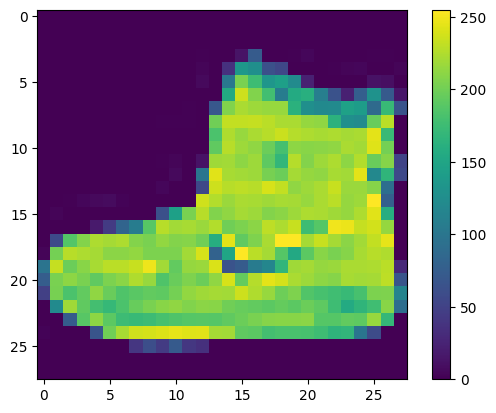

In [3]:
#Изобразим на примере()
plt.figure
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)




In [4]:
#Уменьшаем интенсивность пикселей у изображения для улучшения работы нейросети 
train_images = train_images/255
test_images = test_images/255 

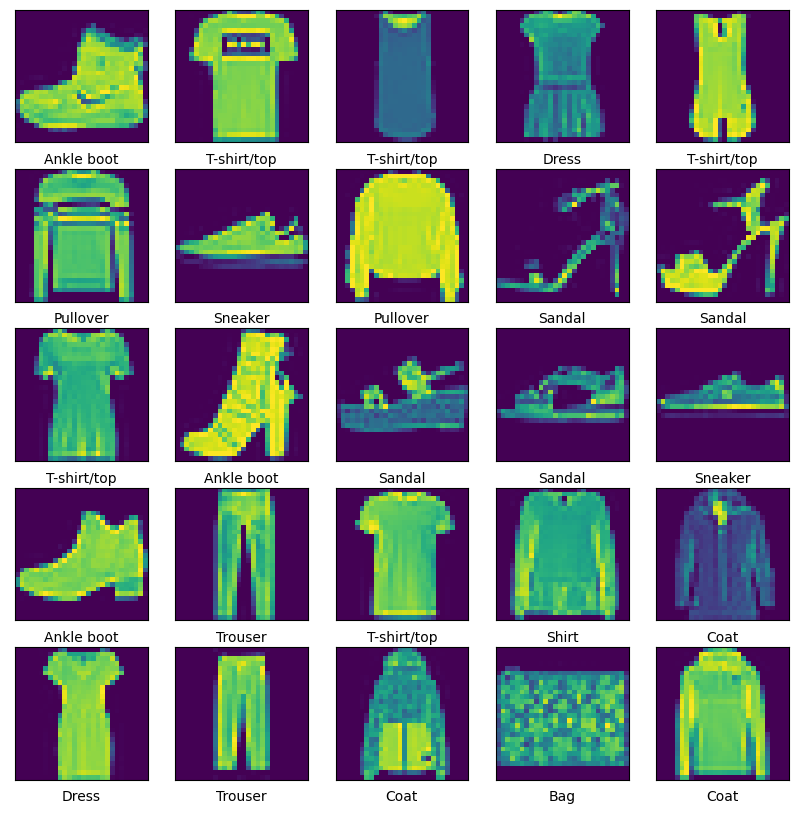

In [5]:
#Изобразим несколько изображений на одном рисунке
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])# cmap=plt.cm.binary
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
#Создание модели неросети
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#перевод формата изображения из двумерного массива в одномерный( из 28х28 на 784х1)
    tf.keras.layers.Dense(128, activation='relu'),# Первый слой. Задаем кол-во нейронов, лучше всего с эти датасетом 128 нейронов
    tf.keras.layers.Dense(10)#Второй слой
])

In [7]:
#компиляция модели 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()# информация о нашей модели, теперь он скомпилирована и собрана, можно переходить к ее обучению 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# эпохи - количество проходов через сеть(чем больше тем лучше, но стоит не забывать о можности компа)
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4963 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3768 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3355 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3112 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2928 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2773 - accuracy: 0.8980
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2653 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2448 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [10]:
# Проверка точности предсказания
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3221 - accuracy: 0.8874 - 338ms/epoch - 1ms/step
Test accuracy: 0.8873999714851379


Начинаем предсказание

In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 689us/step


проверим предсказание изображения под индексом 12

In [13]:
# 
i = 12
predictions[i]

array([2.5207448e-06, 4.0593040e-09, 3.1069033e-06, 4.7022689e-07,
       3.5720566e-06, 8.9024305e-01, 2.0415646e-07, 4.4850204e-02,
       6.4896815e-02, 2.7052828e-08], dtype=float32)

In [14]:
class_names[np.argmax(predictions[i])], class_names[train_labels[i]]

('Sandal', 'Sandal')

Sandal Sandal


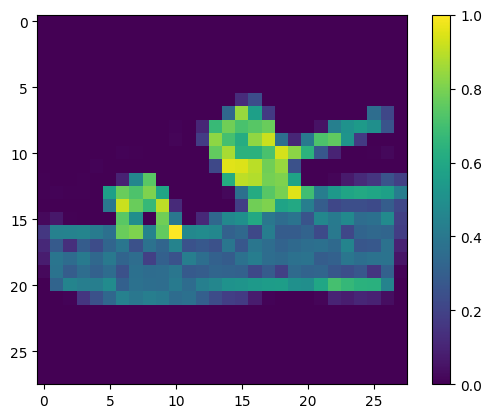

In [15]:
plt.figure()
plt.imshow(train_images[i])
plt.colorbar()
print(class_names[np.argmax(predictions[i])], class_names[train_labels[i]])

Дальше, если останется время для работы, можно реализовать функцию, выводащую информацию для предсказания 

In [16]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)#cmap=plt.cm.binary

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

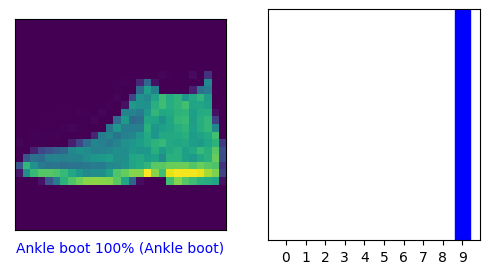

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

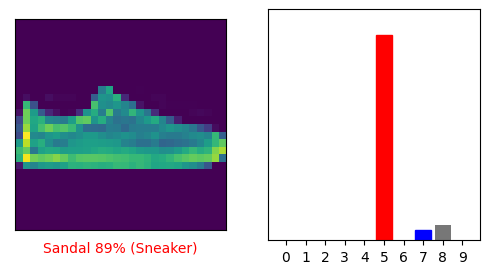

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

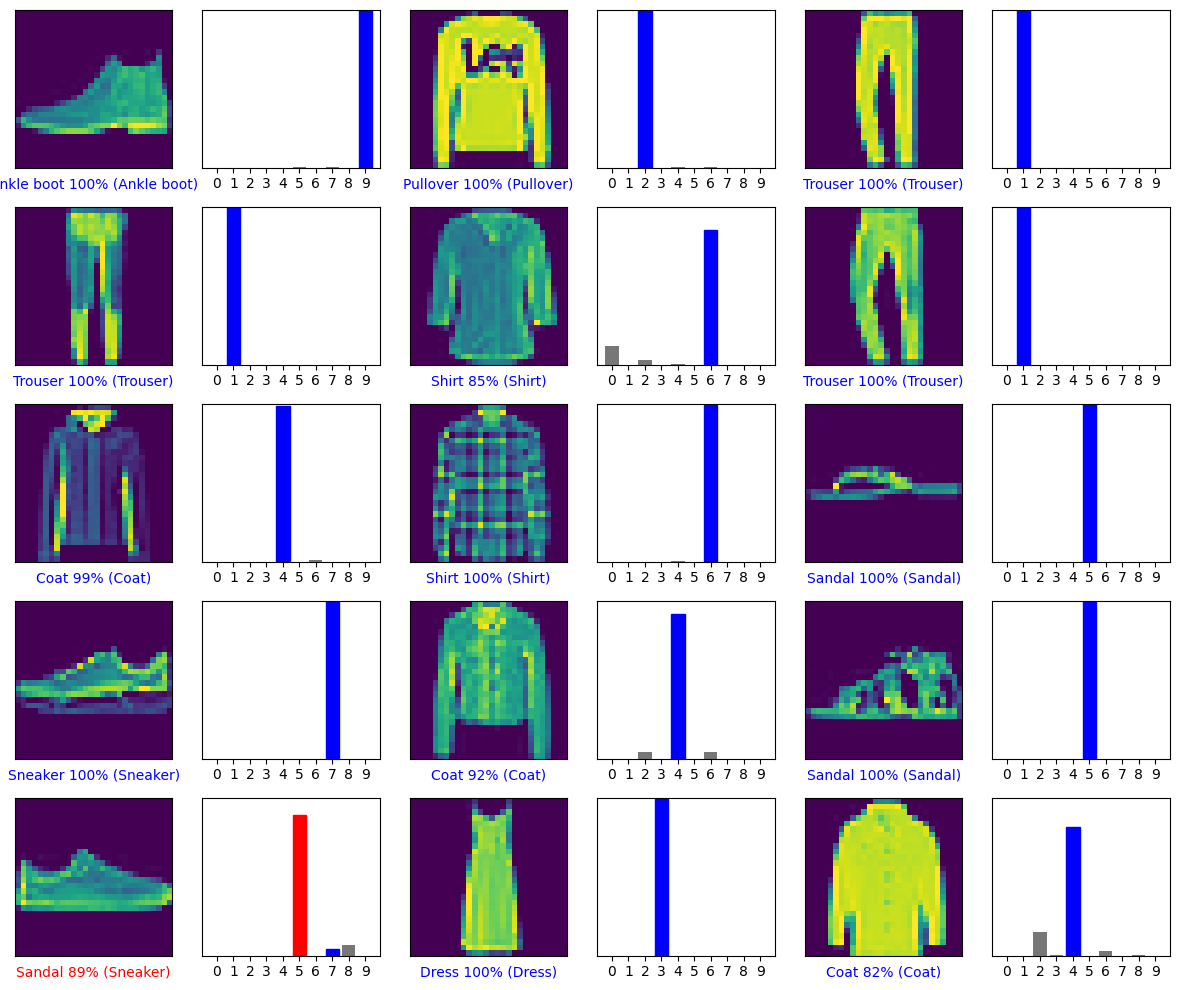

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [20]:
img = test_images[1]

print(img.shape)

(28, 28)


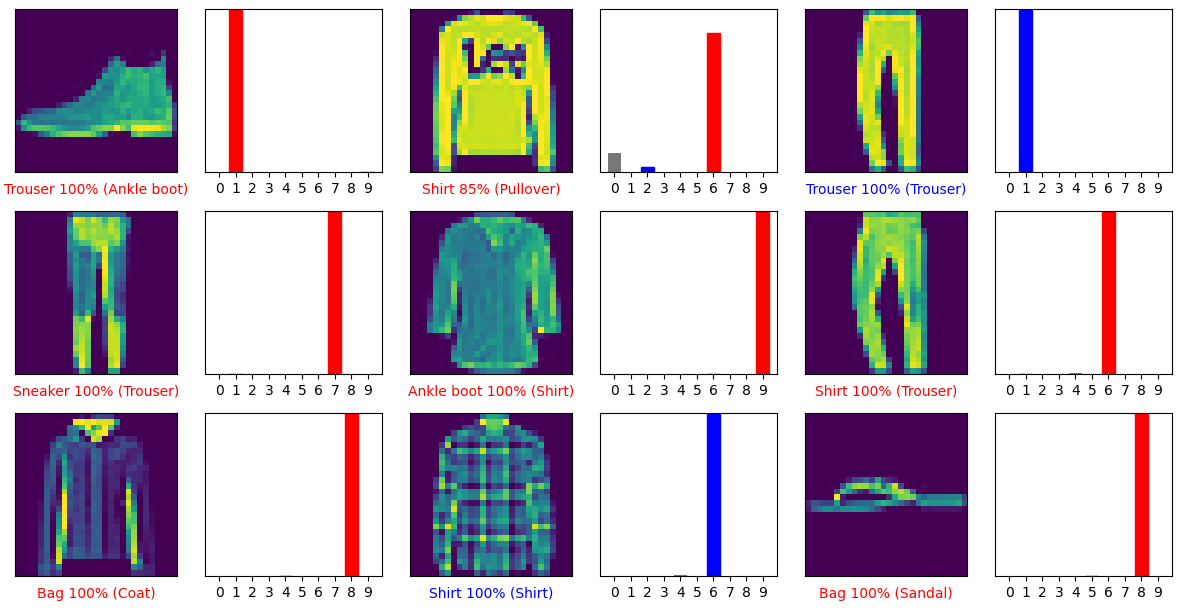

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
images = [3,4,5,9,234,7,34,7,56]
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i, index in zip(range(num_images), images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[index], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[index], test_labels)
plt.tight_layout()
plt.show()